In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = yf.download('EURUSD=X', start = '2023-12-01', end = '2025-06-30')
for i in data.columns:
    print(i)

/var/folders/9q/5mth65fs50q30lwhn0tw6wnc0000gn/T/ipykernel_40224/1013548408.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('EURUSD=X', start = '2023-12-01', end = '2025-06-30')
[*********************100%***********************]  1 of 1 completed

('Close', 'EURUSD=X')
('High', 'EURUSD=X')
('Low', 'EURUSD=X')
('Open', 'EURUSD=X')
('Volume', 'EURUSD=X')


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
Date,,,,,
2023-12-01,1.089206,1.091346,1.083154,1.089206,0
2023-12-04,1.088815,1.088732,1.080567,1.088815,0
2023-12-05,1.083776,1.084834,1.078260,1.083776,0
2023-12-06,1.079366,1.080369,1.077319,1.079366,0
2023-12-07,1.076670,1.079680,1.075766,1.076670,0
...,...,...,...,...,...
2025-06-23,1.150086,1.155175,1.145554,1.150086,0
2025-06-24,1.159904,1.163589,1.158292,1.159904,0


In [4]:
price = data.loc[:, ('Close', 'EURUSD=X')].rename('Price').to_frame()
price

,Price
Date,
2023-12-01,1.089206
2023-12-04,1.088815
2023-12-05,1.083776
2023-12-06,1.079366
2023-12-07,1.076670
...,...
2025-06-23,1.150086
2025-06-24,1.159904
2025-06-25,1.161224


In [5]:
price['SMA12'] = price['Price'].rolling(12).mean()
price['SMA30'] = price['Price'].rolling(30).mean()
price.tail()

,Price,SMA12,SMA30
Date,,,
2025-06-23,1.150086,1.149322,1.137400
2025-06-24,1.159904,1.150532,1.139078
2025-06-25,1.161224,1.152235,1.140501
2025-06-26,1.168374,1.154366,1.142173
2025-06-27,1.169221,1.156489,1.143838


Text(0, 0.5, 'Price')

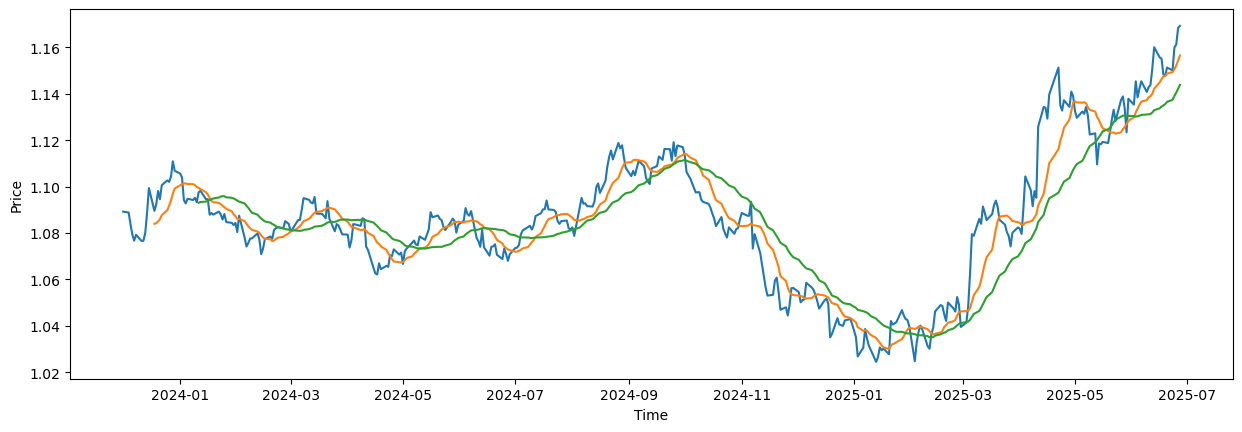

In [6]:
fig,ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(price)
#-------------
ax.set_xlabel('Time')
ax.set_ylabel('Price')

In [7]:
np.where(price['SMA12'] > price['SMA30'])

(array([ 29,  30,  31,  32,  33,  66,  67,  68,  69,  70,  71,  72,  73,
         74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
        188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
        201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
        214, 215, 216, 217, 218, 219, 220, 221, 222, 302, 303, 304, 305,
        306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
        319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
        332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
        345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357,
        358, 359, 360, 361, 362, 363, 364, 365, 366

In [8]:
price['Position'] = np.where(price['SMA12'] > price['SMA30'],1,-1)
price.dropna(inplace=True)
price

,Price,SMA12,SMA30,Position
Date,,,,
2024-01-11,1.097514,1.099440,1.093043,1
2024-01-12,1.098165,1.098929,1.093342,1
2024-01-15,1.094571,1.097571,1.093534,1
2024-01-16,1.094571,1.096551,1.093893,1
2024-01-17,1.087879,1.095075,1.094177,1
...,...,...,...,...
2025-06-23,1.150086,1.149322,1.137400,1
2025-06-24,1.159904,1.150532,1.139078,1
2025-06-25,1.161224,1.152235,1.140501,1


<Axes: title={'center': 'Market Positioning'}, xlabel='Date'>

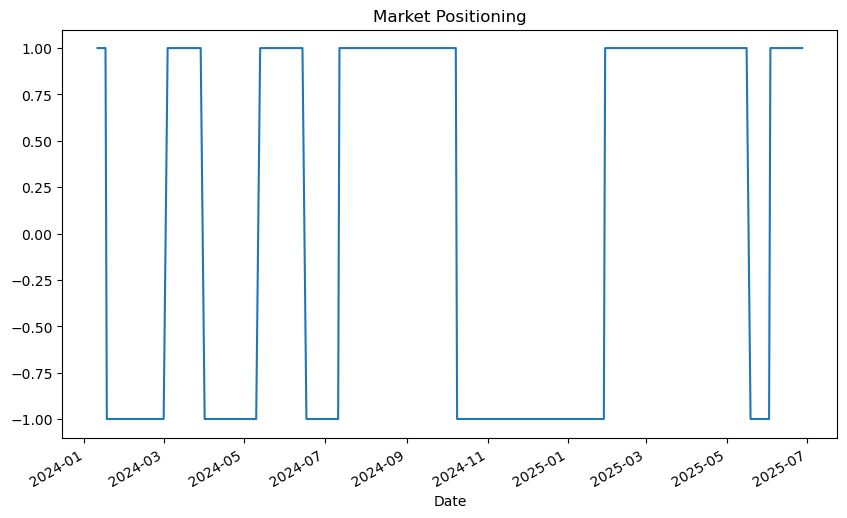

In [9]:
price.Position.plot(ylim = (-1.1,1.1), title = "Market Positioning", figsize = (10,6))

<Axes: >

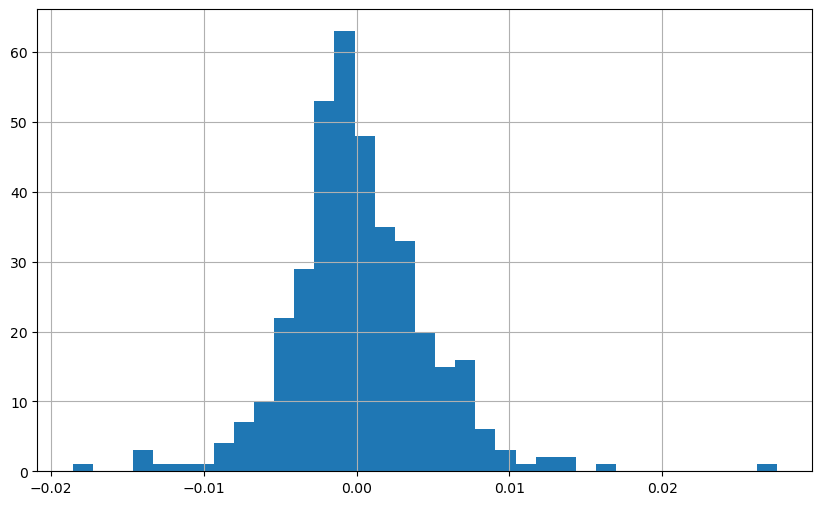

In [10]:
price['Returns'] = np.log(price['Price']/price['Price'].shift(1))
price['Returns'].hist(bins = 35, figsize=(10,6))

In [11]:
price

,Price,SMA12,SMA30,Position,Returns
Date,,,,,
2024-01-11,1.097514,1.099440,1.093043,1,NaN
2024-01-12,1.098165,1.098929,1.093342,1,0.000593
2024-01-15,1.094571,1.097571,1.093534,1,-0.003278
2024-01-16,1.094571,1.096551,1.093893,1,0.000000
2024-01-17,1.087879,1.095075,1.094177,1,-0.006133
...,...,...,...,...,...
2025-06-23,1.150086,1.149322,1.137400,1,-0.001036
2025-06-24,1.159904,1.150532,1.139078,1,0.008501
2025-06-25,1.161224,1.152235,1.140501,1,0.001137


In [12]:
price['Strategy'] = price['Position'].shift(1) * price['Returns']
price[['Returns', 'Strategy']].sum()

Returns     0.063290
Strategy    0.098943
dtype: float64

In [13]:
price[['Returns', 'Strategy']].sum().apply(np.exp)

Returns     1.065336
Strategy    1.104003
dtype: float64

<Axes: title={'center': 'Strategy vs Returns'}, xlabel='Date'>

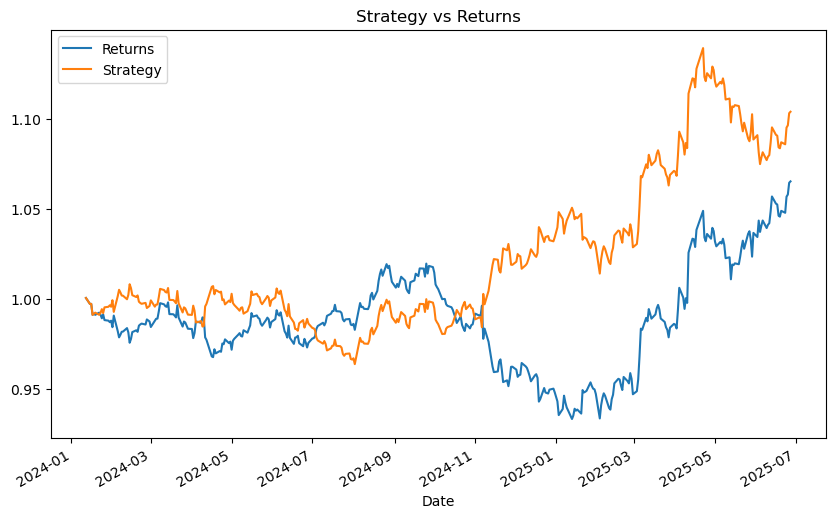

In [14]:
price[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(title = 'Strategy vs Returns', figsize = (10,6))

In [15]:
# Annualised mean in log space
price[['Returns', 'Strategy']].mean() * 252

Returns     0.042194
Strategy    0.065962
dtype: float64

In [16]:
# Annualised mean in real space
np.exp(price[['Returns', 'Strategy']].mean() * 252) -1

Returns     0.043096
Strategy    0.068186
dtype: float64

In [17]:
# Annualised std in log space
price[['Returns', 'Strategy']].std() * 252 ** 0.5

Returns     0.073628
Strategy    0.073558
dtype: float64

In [18]:
# Annulaised std in real space
(price[['Returns', 'Strategy']].apply(np.exp) -1).std() * 252 ** 0.5

Returns     0.073725
Strategy    0.073704
dtype: float64

<Axes: xlabel='Date'>

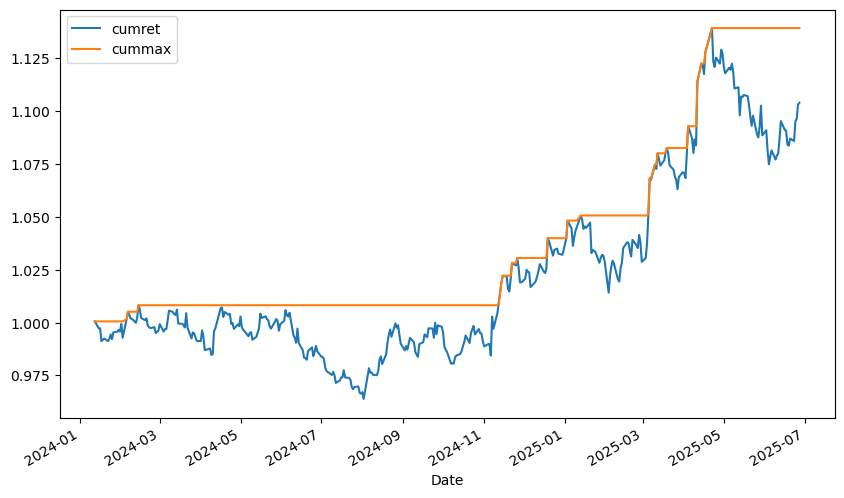

In [19]:
price['cumret'] = price['Strategy'].cumsum().apply(np.exp)
price['cummax'] = price['cumret'].cummax()
price[['cumret','cummax']].plot(figsize=(10,6))

In [20]:
drawdown = price['cummax'] - price['cumret']
drawdown.max()

0.0643998112771702

In [21]:
def max_drawdown(se):
    l,r = 0,1
    max_dd= 0
    while r < len(se):
        if se[l] > se[r]:
            dd = se[l] - se[r]
            max_dd = max(max_dd,dd)
        else:
            l = r
        r+=1
    return max_dd
    
max_drawdown(price['cumret'])

/var/folders/9q/5mth65fs50q30lwhn0tw6wnc0000gn/T/ipykernel_40224/896306227.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if se[l] > se[r]:
/var/folders/9q/5mth65fs50q30lwhn0tw6wnc0000gn/T/ipykernel_40224/896306227.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dd = se[l] - se[r]


0.0643998112771702

In [22]:
len(price['cumret'])

379

In [23]:
price

,Price,SMA12,SMA30,Position,Returns,Strategy,cumret,cummax
Date,,,,,,,,
2024-01-11,1.097514,1.099440,1.093043,1,NaN,NaN,NaN,NaN
2024-01-12,1.098165,1.098929,1.093342,1,0.000593,0.000593,1.000593,1.000593
2024-01-15,1.094571,1.097571,1.093534,1,-0.003278,-0.003278,0.997318,1.000593
2024-01-16,1.094571,1.096551,1.093893,1,0.000000,0.000000,0.997318,1.000593
2024-01-17,1.087879,1.095075,1.094177,1,-0.006133,-0.006133,0.991221,1.000593
...,...,...,...,...,...,...,...,...
2025-06-23,1.150086,1.149322,1.137400,1,-0.001036,-0.001036,1.085935,1.139345
2025-06-24,1.159904,1.150532,1.139078,1,0.008501,0.008501,1.095206,1.139345
2025-06-25,1.161224,1.152235,1.140501,1,0.001137,0.001137,1.096452,1.139345


In [24]:
drawdown

Date
2024-01-11         NaN
2024-01-12    0.000000
2024-01-15    0.003275
2024-01-16    0.003275
2024-01-17    0.009372
                ...   
2025-06-23    0.053409
2025-06-24    0.044139
2025-06-25    0.042892
2025-06-26    0.036141
2025-06-27    0.035341
Length: 379, dtype: float64

In [25]:
temp = drawdown[drawdown == 0]
temp

Date
2024-01-12    0.0
2024-02-05    0.0
2024-02-06    0.0
2024-02-14    0.0
2024-11-12    0.0
2024-11-13    0.0
2024-11-14    0.0
2024-11-15    0.0
2024-11-22    0.0
2024-11-26    0.0
2024-12-19    0.0
2025-01-03    0.0
2025-01-13    0.0
2025-03-05    0.0
2025-03-06    0.0
2025-03-10    0.0
2025-03-12    0.0
2025-03-18    0.0
2025-03-19    0.0
2025-04-04    0.0
2025-04-11    0.0
2025-04-14    0.0
2025-04-17    0.0
2025-04-22    0.0
dtype: float64

In [26]:
periods = temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime()
periods

array([datetime.timedelta(days=24), datetime.timedelta(days=1),
       datetime.timedelta(days=8), datetime.timedelta(days=272),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=7),
       datetime.timedelta(days=4), datetime.timedelta(days=23),
       datetime.timedelta(days=15), datetime.timedelta(days=10),
       datetime.timedelta(days=51), datetime.timedelta(days=1),
       datetime.timedelta(days=4), datetime.timedelta(days=2),
       datetime.timedelta(days=6), datetime.timedelta(days=1),
       datetime.timedelta(days=16), datetime.timedelta(days=7),
       datetime.timedelta(days=3), datetime.timedelta(days=3),
       datetime.timedelta(days=5)], dtype=object)

In [27]:
periods.max()

datetime.timedelta(days=272)

# Momentum Strategies
 Cross Sectional: Compare accross competitors
 Time Series: Compare with past returns


In [28]:
dataM =  yf.download('^XAU', start = '2023-12-01', end = '2025-06-30')
dataM.columns

/var/folders/9q/5mth65fs50q30lwhn0tw6wnc0000gn/T/ipykernel_40224/3623258740.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dataM =  yf.download('^XAU', start = '2023-12-01', end = '2025-06-30')
[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', '^XAU'),
            (  'High', '^XAU'),
            (   'Low', '^XAU'),
            (  'Open', '^XAU'),
            ('Volume', '^XAU')],
           names=['Price', 'Ticker'])

In [29]:
dataM = dataM.loc[:,( 'Close', '^XAU')].rename('Close').to_frame()
dataM


,Close
Date,
2023-12-01,125.800003
2023-12-04,122.449997
2023-12-05,120.080002
2023-12-06,120.000000
2023-12-07,119.510002
...,...
2025-06-23,207.779999
2025-06-24,203.809998
2025-06-25,203.970001


In [30]:
dataM['Returns'] = np.log(dataM['Close']/dataM['Close'].shift(1))
dataM['Position'] = np.sign(dataM['Returns'])

In [31]:
dataM['Strategy'] = dataM['Position'].shift(1) * dataM['Returns']

In [32]:
dataM['Cumret'] = dataM['Strategy'].cumsum().apply(np.exp)

<Axes: xlabel='Date'>

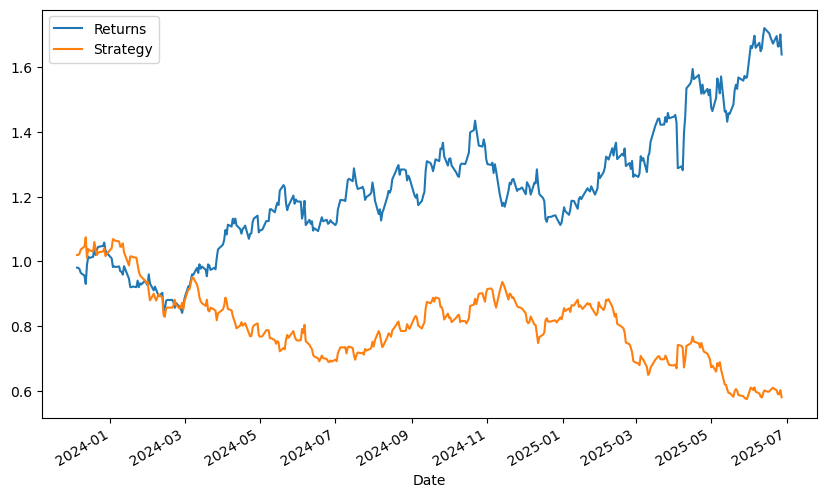

In [33]:
dataM[['Returns', 'Strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

In [34]:
dataM['Position3'] = np.sign(dataM['Returns'].rolling(3).mean())
dataM['Strategy3'] = dataM['Position3'].shift(1) * dataM['Returns']
dataM['Cumret3'] = dataM['Strategy3'].cumsum().apply(np.exp)

<Axes: xlabel='Date'>

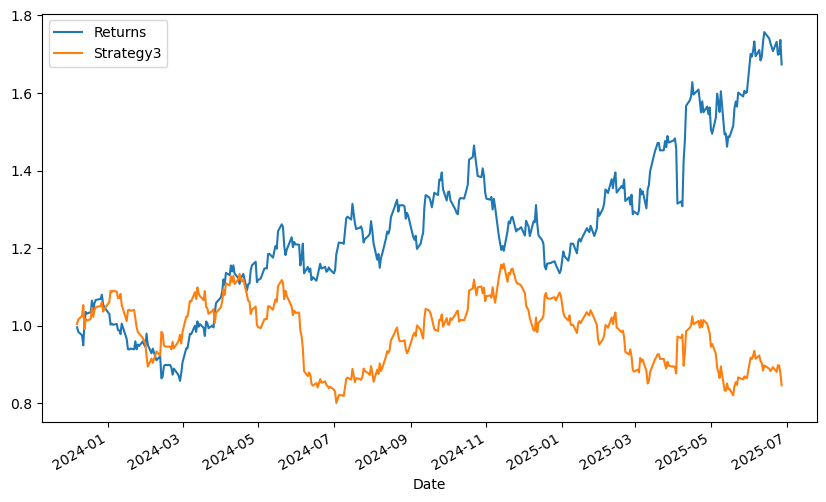

In [35]:
dataM[['Returns', 'Strategy3']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

In [36]:
dataM

,Close,Returns,Position,Strategy,Cumret,Position3,Strategy3,Cumret3
Date,,,,,,,,
2023-12-01,125.800003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-04,122.449997,-0.026991,-1.0,NaN,NaN,NaN,NaN,NaN
2023-12-05,120.080002,-0.019545,-1.0,0.019545,1.019737,NaN,NaN,NaN
2023-12-06,120.000000,-0.000666,-1.0,0.000666,1.020417,-1.0,NaN,NaN
2023-12-07,119.510002,-0.004092,-1.0,0.004092,1.024600,-1.0,0.004092,1.004100
...,...,...,...,...,...,...,...,...
2025-06-23,207.779999,0.013763,1.0,-0.013763,0.600985,-1.0,-0.013763,0.880985
2025-06-24,203.809998,-0.019292,-1.0,-0.019292,0.589502,-1.0,0.019292,0.898146
2025-06-25,203.970001,0.000785,1.0,-0.000785,0.589039,-1.0,-0.000785,0.897442


In [37]:
data2 = yf.download('EURUSD=X', start = '2023-12-01', end = '2025-06-30')
data2

/var/folders/9q/5mth65fs50q30lwhn0tw6wnc0000gn/T/ipykernel_40224/2845242617.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data2 = yf.download('EURUSD=X', start = '2023-12-01', end = '2025-06-30')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
Date,,,,,
2023-12-01,1.089206,1.091346,1.083154,1.089206,0
2023-12-04,1.088815,1.088732,1.080567,1.088815,0
2023-12-05,1.083776,1.084834,1.078260,1.083776,0
2023-12-06,1.079366,1.080369,1.077319,1.079366,0
2023-12-07,1.076670,1.079680,1.075766,1.076670,0
...,...,...,...,...,...
2025-06-23,1.150086,1.155175,1.145554,1.150086,0
2025-06-24,1.159904,1.163589,1.158292,1.159904,0


In [38]:
data2 = data2.loc[:, ('Close', 'EURUSD=X')].rename('Price').to_frame()

data2

,Price
Date,
2023-12-01,1.089206
2023-12-04,1.088815
2023-12-05,1.083776
2023-12-06,1.079366
2023-12-07,1.076670
...,...
2025-06-23,1.150086
2025-06-24,1.159904
2025-06-25,1.161224


In [39]:
print(type(data2.columns))
print(data2.columns)            # see exact labels / levels
print(list(data2.columns))      # useful for tuples


<class 'pandas.core.indexes.base.Index'>
Index(['Price'], dtype='object')
['Price']


In [40]:
data2['return'] = np.log(data2['Price']/data2['Price'].shift(1))

In [41]:
data2['position'] = np.sign(data2['return'].rolling(3).mean())
data2['strategy'] = data2['position'].shift(1) * data2['return']
data2.dropna(inplace = True)
data2

,Price,return,position,strategy
Date,,,,
2023-12-07,1.076670,-0.002501,-1.0,0.002501
2023-12-08,1.079214,0.002361,-1.0,-0.002361
2023-12-11,1.076577,-0.002447,-1.0,0.002447
2023-12-12,1.076658,0.000075,-1.0,-0.000075
2023-12-13,1.079867,0.002976,1.0,-0.002976
...,...,...,...,...
2025-06-23,1.150086,-0.001036,1.0,0.001036
2025-06-24,1.159904,0.008501,1.0,0.008501
2025-06-25,1.161224,0.001137,1.0,0.001137


In [42]:
trades = data2['position'].diff().fillna(0) != 0
trades


Date
2023-12-07    False
2023-12-08    False
2023-12-11    False
2023-12-12    False
2023-12-13     True
              ...  
2025-06-23     True
2025-06-24    False
2025-06-25    False
2025-06-26    False
2025-06-27    False
Name: position, Length: 404, dtype: bool

# MEAN REVERSION

In [43]:
dataS = yf.download('EURUSD=X', start = '2023-12-01', end = '2025-06-30')

/var/folders/9q/5mth65fs50q30lwhn0tw6wnc0000gn/T/ipykernel_40224/3233600025.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dataS = yf.download('EURUSD=X', start = '2023-12-01', end = '2025-06-30')
[*********************100%***********************]  1 of 1 completed


In [44]:
dataS.columns

MultiIndex([( 'Close', 'EURUSD=X'),
            (  'High', 'EURUSD=X'),
            (   'Low', 'EURUSD=X'),
            (  'Open', 'EURUSD=X'),
            ('Volume', 'EURUSD=X')],
           names=['Price', 'Ticker'])

In [45]:
dataS = dataS.loc[:,( 'Close', 'EURUSD=X')].rename('price').to_frame()


In [46]:
dataS

,price
Date,
2023-12-01,1.089206
2023-12-04,1.088815
2023-12-05,1.083776
2023-12-06,1.079366
2023-12-07,1.076670
...,...
2025-06-23,1.150086
2025-06-24,1.159904
2025-06-25,1.161224


In [47]:
dataS['returns'] = np.log(dataS['price']/dataS['price'].shift(1))

In [48]:
SMA = 25
dataS['SMA'] = dataS['price'].rolling(SMA).mean()
dataS['sd'] = dataS['price'].rolling(SMA).std()

In [49]:
dataS['UBB'] = dataS['SMA'] + 2 * dataS['sd']
dataS['LBB'] = dataS['SMA'] - 2 * dataS['sd']

In [50]:
threshold = 2
dataS['distance'] = dataS['price'] - dataS['SMA']
dataS

,price,returns,SMA,sd,UBB,LBB,distance
Date,,,,,,,
2023-12-01,1.089206,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-04,1.088815,-0.000359,NaN,NaN,NaN,NaN,NaN
2023-12-05,1.083776,-0.004638,NaN,NaN,NaN,NaN,NaN
2023-12-06,1.079366,-0.004078,NaN,NaN,NaN,NaN,NaN
2023-12-07,1.076670,-0.002501,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-06-23,1.150086,-0.001036,1.141507,0.009841,1.161189,1.121825,0.008579
2025-06-24,1.159904,0.008501,1.142969,0.009745,1.162460,1.123478,0.016935
2025-06-25,1.161224,0.001137,1.144266,0.009937,1.164140,1.124393,0.016958


<Axes: xlabel='Date'>

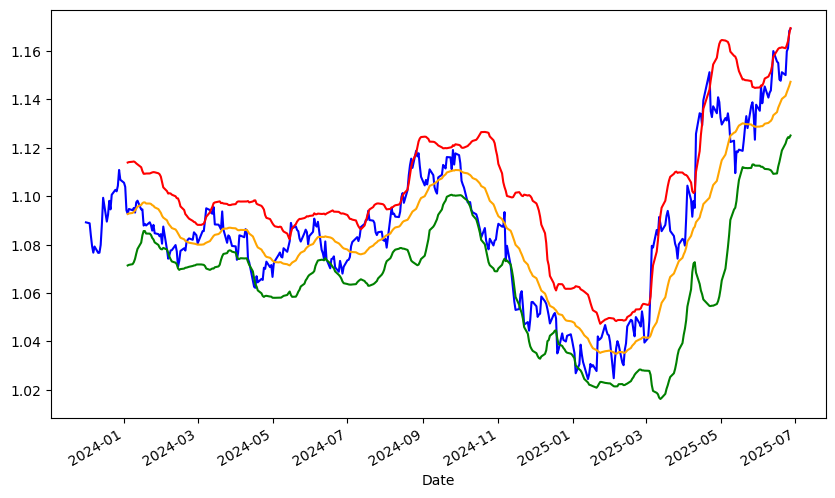

In [51]:
dataS['price'].plot(figsize = (10,6), color = 'b')
dataS['SMA'].plot(color  ='orange')
dataS['UBB'].plot(color = 'r')
dataS['LBB'].plot(color = 'g')


In [52]:
dataS['distance'] = dataS['price'] - dataS['SMA']
mu = dataS['distance'].rolling(SMA).mean()
sigma = dataS['distance'].rolling(SMA).std()
eps =1e-12
dataS['distanceN'] = (dataS['distance']-mu)/sigma.replace(0,eps)
dataS

,price,returns,SMA,sd,UBB,LBB,distance,distanceN
Date,,,,,,,,
2023-12-01,1.089206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-04,1.088815,-0.000359,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-05,1.083776,-0.004638,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-06,1.079366,-0.004078,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-07,1.076670,-0.002501,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-06-23,1.150086,-0.001036,1.141507,0.009841,1.161189,1.121825,0.008579,-0.124585
2025-06-24,1.159904,0.008501,1.142969,0.009745,1.162460,1.123478,0.016935,0.884633
2025-06-25,1.161224,0.001137,1.144266,0.009937,1.164140,1.124393,0.016958,0.823463


In [53]:
dataS['z'] = (dataS['price'] - dataS['price'].rolling(SMA).mean()) / dataS['price'].rolling(SMA).std()


In [54]:
ent_tr,ext_tr = 0.9,0.5

long_pos = dataS['distanceN'] < -ent_tr
short_pos = dataS['distanceN'] > ent_tr
flat_pos = dataS['distanceN'].abs() < ext_tr

pos = np.where(flat_pos,0,np.nan)
pos = np.where(long_pos,1,pos)
pos = np.where(short_pos,-1,pos)
dataS['position'] = pd.Series(pos,index=dataS.index).ffill().fillna(0)

dataS['strategy'] = dataS['position'].shift(1) * dataS['returns']

In [55]:
dataS

,price,returns,SMA,sd,UBB,LBB,distance,distanceN,z,position,strategy
Date,,,,,,,,,,,
2023-12-01,1.089206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2023-12-04,1.088815,-0.000359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000
2023-12-05,1.083776,-0.004638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000
2023-12-06,1.079366,-0.004078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000
2023-12-07,1.076670,-0.002501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-23,1.150086,-0.001036,1.141507,0.009841,1.161189,1.121825,0.008579,-0.124585,0.871804,0.0,-0.000000
2025-06-24,1.159904,0.008501,1.142969,0.009745,1.162460,1.123478,0.016935,0.884633,1.737755,0.0,0.000000
2025-06-25,1.161224,0.001137,1.144266,0.009937,1.164140,1.124393,0.016958,0.823463,1.706616,0.0,0.000000


In [56]:
dataS['creturns'] = dataS['returns'].cumsum().apply(np.exp)
dataS['cstrategy'] = dataS['strategy'].cumsum().apply(np.exp)

<Axes: xlabel='Date'>

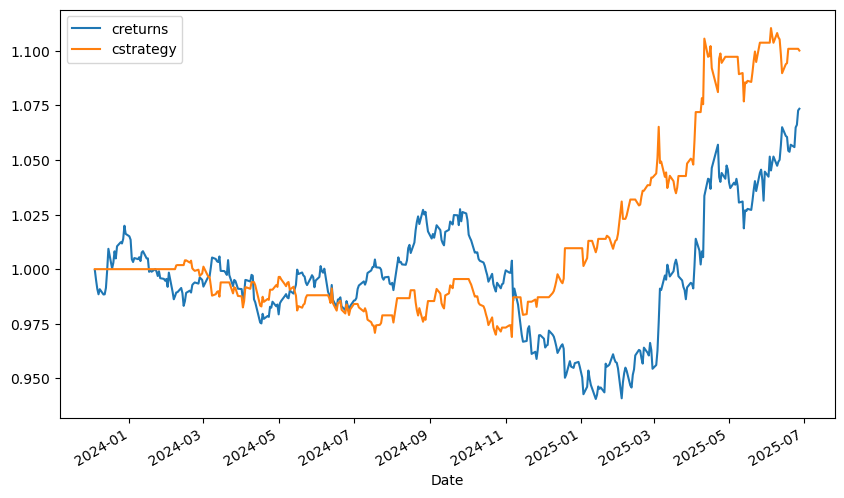

In [57]:
dataS[['creturns','cstrategy']].plot(figsize=(10,6))

In [66]:
dataS

,price,returns,SMA,sd,UBB,LBB,distance,distanceN,z,position,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,
2023-12-01,1.089206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2023-12-04,1.088815,-0.000359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000,0.999641,1.000000
2023-12-05,1.083776,-0.004638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000,0.995015,1.000000
2023-12-06,1.079366,-0.004078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000,0.990966,1.000000
2023-12-07,1.076670,-0.002501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000,0.988490,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-23,1.150086,-0.001036,1.141507,0.009841,1.161189,1.121825,0.008579,-0.124585,0.871804,0.0,-0.000000,1.055894,1.100915
2025-06-24,1.159904,0.008501,1.142969,0.009745,1.162460,1.123478,0.016935,0.884633,1.737755,0.0,0.000000,1.064908,1.100915
2025-06-25,1.161224,0.001137,1.144266,0.009937,1.164140,1.124393,0.016958,0.823463,1.706616,0.0,0.000000,1.066120,1.100915


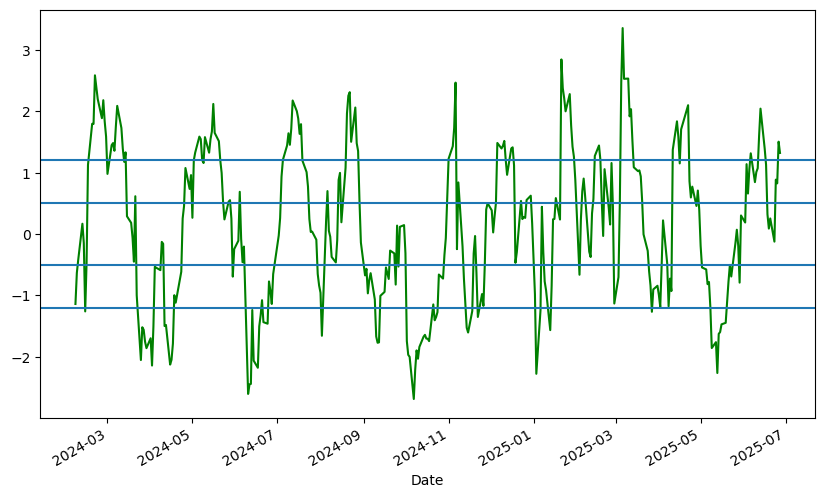

In [58]:
dataS['distanceN'].plot(figsize=(10,6),color='g')
plt.axhline(1.2)
plt.axhline(0.5)
plt.axhline(-0.5)
plt.axhline(-1.2)

In [59]:
[3,4]

[3, 4]

In [62]:
type(dataS['price'])

pandas.core.series.Series

In [65]:
dataS['distance'].rolling(20).mean()

Date
2023-12-01         NaN
2023-12-04         NaN
2023-12-05         NaN
2023-12-06         NaN
2023-12-07         NaN
                ...   
2025-06-23    0.011875
2025-06-24    0.012238
2025-06-25    0.012856
2025-06-26    0.014259
2025-06-27    0.014901
Name: distance, Length: 408, dtype: float64